# 

# Fly Safely to Your Destination Vacation: Ranking private airplanes based on safety and risk
### Lotus Baumgarner, Norman Jen, and Bekah McLaughlin


<img src = "./Images/private_jet.jpeg">


### The Business Need

The luxury travel resort, White Lotus, is opening a new location in Marthas Vineyard and intends to purchase private planes for guest transportation from mainland locations to the island resort property. White Lotus takes great pride in its renowned commitment to delivering a luxurious and exclusive experience, with private air travel being an integral component at this location. The primary goal is to prioritize the safety of guests and mitigate risks during transportation. Furthermore, among the safest options, White Lotus aims to pinpoint the most cost-effective, high-end, and highest passenger capacity choice.

#### Safety First:
Data analysis will focus on evaluating a database of historical incident and accident rates of different aircrafts. From these records we will extract a list the safest potential private jet options.
  - *How do we measure safety when looking at historical records of aircraft accidents and incidents?*
  - *Based on statistical analysis and chosen safety measuring method, what can we determine are the safest private jets to recommend to White Lotus?*

#### Other Incidental Considerations:
After compiling a list of the safest private jets, we'll also compare cost and passenger capacity.
  - *Which option is the most cost effective?*
  - *Which option can transport the largest group of guests?*
  - *Which option could White Lotus splurge on for the guest experience?*

**Stakeholders: White Lotus Resorts owners and investors, guests, and White Lotus employees**

# 1. Initial Dataset assessment

### Importing libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing in our analytics and visualization libraries pandas, NumPy, matplotlib and seaborn

### What does the data look like?

First we'll import the dataset from National Transportation Safety Board, Aviation Accident Database & Synopses.


In [138]:
df = pd.read_csv('./Data/AviationData.csv', encoding = 'mac_roman', low_memory = False)
#Import and read .csv file


Next, we'll use a few preliminary methods to get a feel for the size and content of the data.


In [139]:
df.head()
#Taking an initial look at the dataset

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [141]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i


Clearly, with 88,889 rows, 31 columns, and a considerable amount of missing data, there is a lot of cleaning and investigation to do.

Upon this initial examination, it's clear that 'Total.Fatal.Injuries,' 'Total.Serious.Injuries,' 'Total.Minor.Injuries,' 'Total.Uninjured,' and 'Aircraft.damage' will all contain crucial data for assessing aircraft safety.

However, it is also clear that there is a significant amount of irrelevant and incomplete data. Some of this can be eliminated before proceeding with meticulous cleaning and analysis.

# 2 Exploring data to find irrelevant and incomplete columns

In [142]:
df['Event.Id'].head(10)

0    20001218X45444
1    20001218X45447
2    20061025X01555
3    20001218X45448
4    20041105X01764
5    20170710X52551
6    20001218X45446
7    20020909X01562
8    20020909X01561
9    20020909X01560
Name: Event.Id, dtype: object

This column appears to represent a unique numeric identifier for each accident or incident. Since it doesn't contribute to the ultimate goal of finding safe airplane recommendations for the business, we'll include it in the list of columns to be eliminated.

In [143]:
df['Air.carrier'].value_counts() 

Pilot                             258
American Airlines                  90
United Airlines                    89
Delta Air Lines                    53
SOUTHWEST AIRLINES CO              42
                                 ... 
Northeastern Aero Classics LLC      1
Franklin Aviation                   1
Wright Flyers Aviation, Inc         1
DENISAR RICHARD A                   1
Ronald G. Hook                      1
Name: Air.carrier, Length: 13590, dtype: int64

White Lotus will hire its own pilots, eliminating the need for an air carrier. Upon closer inspection of this column, it appears that there is no additional useful information to be extracted. Therefore, we'll include it in the list of columns to be eliminated.

In [144]:
df['Airport.Code'].value_counts()

NONE    1488
PVT      485
APA      160
ORD      149
MRI      137
        ... 
KATS       1
SDVI       1
TS01       1
ND48       1
1MD3       1
Name: Airport.Code, Length: 10375, dtype: int64

In [145]:
df['Airport.Code'].value_counts()

NONE    1488
PVT      485
APA      160
ORD      149
MRI      137
        ... 
KATS       1
SDVI       1
TS01       1
ND48       1
1MD3       1
Name: Airport.Code, Length: 10375, dtype: int64

Both 'Airport.Code' and 'Airport.Name' show a significant amount of missing data, as we saw earlier.

Upon closer examination, it becomes apparent that the most common value in 'Airport.Code' is 'NONE,' indicating a more missing data than we initially could see.

Further examination of 'Airport.Name' values shows us that, although the data is messy, many airports associated with these events are private.

However, this information is irrelevant to our project, as White Lotus operates its own private airports exclusively for guests. Therefore, we can disregard the data in both of these columns.

In [146]:
df['Longitude'].sample(n=15)
#Looking at a random sample of 15 values from the 'Longitude' column to get a feel for it's contents

24959         NaN
73125    0894136W
42830         NaN
33589         NaN
3665          NaN
43513         NaN
61785    -118.155
5327          NaN
87541    0812551W
54315     -109.51
7313          NaN
29533         NaN
78549    0106925W
25018         NaN
41489         NaN
Name: Longitude, dtype: object

In [147]:
df['Latitude'].sample(n=15)
#Looking at a random sample of 15 values from the 'Latitude' column to get a feel for it's contents

48862          NaN
18421          NaN
78730      043739N
58624    35.336111
50051          NaN
3482           NaN
23241          NaN
17401          NaN
19637          NaN
10303          NaN
6339           NaN
33433          NaN
25228          NaN
6032           NaN
7526           NaN
Name: Latitude, dtype: object

We had already identified from our initial inspection that 'Longitude' and 'Latitude' contained substantial amounts of missing data. Examining a few sample values underscores the prevalence of NaNs in these columns. Given the extensive missing data and the realization that these columns won't contribute to determining the safety of aircraft, we will eliminate them.

In [148]:
df['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [149]:
df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

After reviewing a summary of the contents in 'Schedule' and 'Purpose.of.flight,' it's clear that these columns will not contribute to determining aircraft safety. Therefore, we will eliminate them.

In [150]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(60)         1
Fatal(110)        1
Fatal(121)        1
Fatal(230)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [151]:
df['Injury.Severity'].sample(10)

38940    Non-Fatal
45341    Non-Fatal
29162    Non-Fatal
58162    Non-Fatal
69105    Non-Fatal
40288    Non-Fatal
11902    Non-Fatal
14858    Non-Fatal
82023    Non-Fatal
6714     Non-Fatal
Name: Injury.Severity, dtype: object

The data in 'Injury.Severity' is messy, but seems to distinguish between an injury being 'Fatal', 'Non-Fatal', and 'Incident'. However, upon closer inspection, we see that all this information is duplicated in other columns such as 'Investigation.Type,' 'Total.Fatal.Injuries,' 'Total.Serious.Injuries,' 'Total.Minor.Injuries,' and 'Total.Uninjured.' As 'Injury.Severity' only contains redundant information, we will eliminate this column.

#### To make our data easier to clean and further filter, we'll remove all of the columns discussed so far.

In [152]:
df.drop(['Event.Id', 'Air.carrier', 'Latitude', 'Longitude', 'Airport.Code', 'Injury.Severity', 'Schedule', 'Purpose.of.flight', 'Airport.Name'], axis=1, inplace = True)
#Remove columns: Event.Id, Air.carrier, Latitude, Longitude, Airport.Code, Injury.Severity, Schedule, Purpose.of.flight, Airport.Name

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Registration.Number     87572 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81812 non-null  object 
 13  FAR.Description         32023 non-null  object 
 14  Total.Fatal.Injuries    77488 non-null

Narrowing down from 31 columns to 22 is beginning to feel more manageable.

# 3 Next, we'll examine the values of additional columns to identify rows for elimination.

In [154]:
df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

We do not intend to recommend any amateur-built aircraft to White Lotus. We will eliminate all rows that indicate 'Yes' in the 'Amateur.Built' column. Then, since we will no longer need this column, we will proceed to delete it.

In [155]:
amateur_built = df['Amateur.Built'] == 'Yes'
df = df[~amateur_built]
#Remove amateur-built aircrafts

In [156]:
df = df.drop(columns = 'Amateur.Built')
#Remove Amateur.Built column

In [157]:
df['Aircraft.Category'].value_counts()

Airplane             24434
Helicopter            3297
Glider                 476
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: Aircraft.Category, dtype: int64

White Lotus is only interested in airplanes. All the rows with other aircrafts in the 'Aircraft.Category' can be removed.

In [158]:
df = df[df['Aircraft.Category'] == 'Airplane']
#Remove all aircrafts that are not airplanes

Additionally, our focus is solely on data where we have information about the 'Make' and 'Model' of the airplane. Any NaNs in these columns render the associated row irrelevant; hence, we will remove them.

In [159]:
df.dropna(subset = ['Make', 'Model'], inplace = True)
#Remove data with no information on Make and Model

In [160]:
df['Country'].value_counts()

United States             21119
Brazil                      239
United Kingdom              207
Mexico                      202
Canada                      169
                          ...  
Singapore                     1
Bosnia and Herzegovina        1
Isle of Man                   1
CÙte d'Ivoire                 1
Slovakia                      1
Name: Country, Length: 165, dtype: int64

In [161]:
df['Country']

5        United States
7        United States
8        United States
12       United States
13       United States
             ...      
88869    United States
88873    United States
88876    United States
88877    United States
88886    United States
Name: Country, Length: 24415, dtype: object

In [162]:
df['Country'].value_counts() / len(df['Country'])

United States             0.865001
Brazil                    0.009789
United Kingdom            0.008478
Mexico                    0.008274
Canada                    0.006922
                            ...   
Singapore                 0.000041
Bosnia and Herzegovina    0.000041
Isle of Man               0.000041
CÙte d'Ivoire             0.000041
Slovakia                  0.000041
Name: Country, Length: 165, dtype: float64

Over 86% of of the data is from the United States. Since White Lotus' flights for will only take place within the United States, we'll remove all rows with other values.

In [163]:
df['Country'] = df['Country'].str.upper()

In [164]:
df = df[df['Country'] == 'UNITED STATES']
#Remove data outside of the United States

In [165]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], yearfirst=True)
#Convert Event Date column to DateTime

In [166]:
df = df.loc[df['Event.Date'] >= '1993-01-01']
#Remove data prior to 1993

On the [datasource website](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data), it's stated under the acknowledgements that "Full narrative descriptions may not be available for dates before 1993" due to incomplete record keeping before it was the responsibility of National Transportation Safety Board. In order to work the most complete data, we decided to eliminate all rows with 'Event.Date's before 1993.  To do this, we had to change the 'Event.Date' column to DateTime and then filter based on date.

# 4. Final Cleaning

Based on the analysis conducted so far, it's evident that data cleaning is required. The column headers, 'Make,' and 'Model' exhibit inconsistent formatting. We'll look at this and we'll fix this with the following code. 

In [167]:
currentheaders = list(df.columns.values)
df.columns = [c.replace('.', ' ').title() for c in currentheaders]
#Clean header titles

In [168]:
df['Make'].sample(15)
#Different spacing and characters need to be cleaned.

64959                  Cessna
66780                  CESSNA
70047                  CESSNA
63501                   Piper
83754    Textron Aviation Inc
76834             DEHAVILLAND
66617                  CESSNA
72946                   PIPER
85697                   PIPER
83786                   Piper
78072                ROCKWELL
84856              Mitsubishi
72134                   PIPER
70595                   PIPER
82591           ULTRALITE SRO
Name: Make, dtype: object

In [169]:
df['Model'].sample(15)
#Different spacing and characters need to be cleaned.

63631              172
80582            PA 12
69906               8E
63123             182P
61891      PA 32R 301T
68017            T206H
82312              AA1
67565     Sportcruiser
67227             182Q
87832              MXS
87357    TTX Inc. T240
78157      CL 600 2B19
72977               58
69797             310R
71144          737-7H4
Name: Model, dtype: object

In [170]:
df['Make'] = df['Make'].str.upper()
df['Model'] = df['Model'].str.upper()

df['Make'] = df['Make'].str.replace('-', '')
df['Make'] = df['Make'].str.replace('(', '')
df['Make'] = df['Make'].str.replace(')', '')
df['Make'] = df['Make'].str.replace('/', '')
df['Make'] = df['Make'].str.replace(' ', '')
df['Make'] = df['Make'].str.replace('.', '')
df['Make'] = df['Make'].str.replace('&', '')
df['Model'] = df['Model'].str.replace('-', '')
df['Model'] = df['Model'].str.replace('(', '')
df['Model'] = df['Model'].str.replace(')', '')
df['Model'] = df['Model'].str.replace('/', '')
df['Model'] = df['Model'].str.replace(' ', '')
df['Model'] = df['Model'].str.replace('.', '')
df['Model'] = df['Model'].str.replace('&', '')

#Clean strings in Make and Model columns by replacing special characters with '' and changing the case to all upper

In the next steps we'll look closer at some remaining columns to analyze the data for elimination and cleaning.

In [171]:
df['Weather Condition'].value_counts()

VMC    16592
IMC      947
Unk      107
UNK        2
Name: Weather Condition, dtype: int64

In [172]:
df['Broad Phase Of Flight'].value_counts()

Landing        1246
Takeoff         485
Cruise          251
Approach        224
Maneuvering     153
Taxi            106
Go-around        89
Descent          64
Climb            53
Standing         44
Unknown          12
Other             2
Name: Broad Phase Of Flight, dtype: int64

In [173]:
df['Publication Date'].head()

32592    17-08-2012
33535    17-10-2016
33711    17-10-2016
33880    28-12-2010
34210    01-02-2016
Name: Publication Date, dtype: object

In [174]:
df['Investigation Type'].value_counts()

Accident    17642
Incident      434
Name: Investigation Type, dtype: int64

In [175]:
df['Registration Number'].value_counts()

UNREG     13
N8402K     5
N5408Y     4
N99HV      4
N323KT     4
          ..
N95514     1
N5562Q     1
N523R      1
N602SS     1
N544LM     1
Name: Registration Number, Length: 17400, dtype: int64

The columns 'Broad Phase Of Flight,' 'Registration Number,' 'Weather Condition,' and 'Publication Date' contain irrelevant data concerning the purchase of a safe airplane. Although weather and visibility undoubtedly influence safety, these variables won't impact the type of plane we recommend.

We researched the difference between ['Incident' and 'Accident'](https://www.aviation.govt.nz/safety/safety-reporting/what-is-an-accident-or-incident/#:~:text=The%20word%20'occurrence'%20is%20used,mean%20any%20accident%20or%20incident.&text=the%20aircraft%20is%20missing%20or,affect%2C%20the%20safety%20of%20operation.) values in the 'Investigation Type' column. An 'Incident' is defined as 'any occurrence, other than an accident, associated with the operation of an aircraft and affects, or could affect, the safety of operation.' An accident is defined as 'an occurrence associated with the operation of an aircraft' that results in injury or fatality.

Based on these definitions, we are interested in both 'Investigation Types.' We'll keep this column.

Consequently, we will eliminate all the discussed columns, along with 'Country' and 'Aircraft Category,' which have become irrelevant after cleaning up the rows.

In [176]:
df.drop(['Country', 'Aircraft Category', 'Registration Number', 'Broad Phase Of Flight', 'Weather Condition', 'Publication Date'], axis=1, inplace = True)
#Remove Country, Aircraft Category, Broad Phase of Flight, Weather Condition, and Publication Date columns

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18076 entries, 32592 to 88886
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation Type      18076 non-null  object        
 1   Accident Number         18076 non-null  object        
 2   Event Date              18076 non-null  datetime64[ns]
 3   Location                18076 non-null  object        
 4   Aircraft Damage         17645 non-null  object        
 5   Make                    18076 non-null  object        
 6   Model                   18076 non-null  object        
 7   Number Of Engines       17592 non-null  float64       
 8   Engine Type             16427 non-null  object        
 9   Far Description         18074 non-null  object        
 10  Total Fatal Injuries    15552 non-null  float64       
 11  Total Serious Injuries  15575 non-null  float64       
 12  Total Minor Injuries    15856 non-null  fl

Things are looking much cleaner and more consise. For our final cleaning before we start analyzing the pertinent data, we'll check out the rest of the columns that aren't obvious if they are helpful or not.

In [178]:
df['Report Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                               2729
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                                                                                                                                                                                   50
A loss of engine power for undetermined reasons.                                                                                                                    

In [179]:
df['Far Description'].value_counts()

091                              13336
Part 91: General Aviation         2430
137                                739
135                                527
121                                523
Part 137: Agricultural             148
PUBU                               124
Part 135: Air Taxi & Commuter       68
Part 121: Air Carrier               62
129                                 45
091K                                14
NUSC                                12
NUSN                                10
Public Use                           9
Part 129: Foreign                    8
UNK                                  7
Unknown                              4
125                                  4
ARMF                                 2
Part 125: 20+ Pax,6000+ lbs          1
Part 91 Subpart K: Fractional        1
Name: Far Description, dtype: int64

In [180]:
df['Engine Type'].value_counts()

Reciprocating    14513
Turbo Prop        1117
Turbo Fan          650
Turbo Jet          119
Unknown             12
Turbo Shaft         10
Electric             5
UNK                  1
Name: Engine Type, dtype: int64

In [181]:
df['Number Of Engines'].value_counts()

1.0    15170
2.0     2356
4.0       41
3.0       20
0.0        3
6.0        1
8.0        1
Name: Number Of Engines, dtype: int64

We decided to keep 'Report Status' and 'FAR Description.' While they may not significantly contribute to our ultimate findings, they could serve as helpful references if another datapoint becomes confusing.

We also chose to retain 'Engine Type' and 'Number Of Engines' as they may be interesting variables to consider when examining overall safety.

# 5. Filling in remaining missing data

As we've identified, 'Aircraft Damage,' 'Total Fatal Injuries,' 'Total Serious Injuries,' 'Total Minor Injuries,' and 'Total Uninjured' will be our most important values when it comes to analyzing safety. We'll examine these columns and perform statistical analysis to fill in the NaNs, particularly in these columns, and in others where possible.

In [182]:
df.isna().sum()

Investigation Type           0
Accident Number              0
Event Date                   0
Location                     0
Aircraft Damage            431
Make                         0
Model                        0
Number Of Engines          484
Engine Type               1649
Far Description              2
Total Fatal Injuries      2524
Total Serious Injuries    2501
Total Minor Injuries      2220
Total Uninjured            508
Report Status             1924
dtype: int64

In [183]:
df['Total Fatal Injuries'].head(10)

32592    2.0
33535    1.0
33711    1.0
33880    NaN
34210    1.0
34275    0.0
34342    5.0
35545    4.0
35887    NaN
35933    NaN
Name: Total Fatal Injuries, dtype: float64

In [184]:
df['Total Minor Injuries'].head(10)

32592    NaN
33535    NaN
33711    NaN
33880    NaN
34210    NaN
34275    0.0
34342    NaN
35545    NaN
35887    1.0
35933    NaN
Name: Total Minor Injuries, dtype: float64

In [185]:
df.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,17592.000000,15552.000000,15575.000000,15856.000000,17568.000000
mean,1.143702,0.326067,0.300161,0.201879,5.069843
std,0.378395,2.117862,1.873722,0.768046,26.445175
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,228.000000,137.000000,50.000000,576.000000


In [186]:
df['Aircraft Damage'].value_counts()

Substantial    15795
Destroyed       1443
Minor            367
Unknown           40
Name: Aircraft Damage, dtype: int64

In [187]:
df['Number Of Engines'].median()

1.0

Based on our analysis, we can reasonably assume that any NaNs in the Injury columns should be interpreted as 0. Operating under this assumption, we have chosen to fill the NaNs in these categories with 0s.

The 'Number Of Engines' mean is 1.14, but the data is skewed towards the minimum. Due to this skewness, it's more accurate to fill in the missing data in the column with the median, which is 1.

Additionally, we identified more missing data under 'Aircraft Damage.' We will replace the 'Unknowns' with NaNs.

There is no accurate method to fill in the missing data in 'Aircraft Damage' or 'Engine Type,' so we will leave those NaNs in place.

In [188]:
df['Number Of Engines'] = df['Number Of Engines'].fillna(1)
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(0)
df['Total Serious Injuries'] = df['Total Serious Injuries'].fillna(0)
df['Total Minor Injuries'] = df['Total Minor Injuries'].fillna(0)
df['Total Uninjured'] = df['Total Uninjured'].fillna(0)

#Fill NaNs - Number of Engines with 1 (median/mode), Fatal Injuries with 0 (intended input), Serious Injuries with 0 (intended input), Minor Injuries with 0 (intended input), and Uninjured with 1 (most common value and results in at least 1 passenger for each accident)

In [189]:
df['Aircraft Damage'].replace('Unknown', np.nan, inplace = True)
#Replace 'Unknown' values in Aircraft Damage with NaN

Finally, we know that White Lotus is looking for private aircrafts. We can narrow down our data by omitting rows that are not indicated to be private based on the 'FAR Description.'

In [190]:
df['Far Description'].replace('091', 91, inplace = True)
df['Far Description'].replace('Part 91: General Aviation', 91, inplace = True)
df['Far Description'].replace('091K', 91, inplace = True)
df['Far Description'].replace('Part 91 Subpart K: Fractional', 91, inplace = True)
df = df[df['Far Description'] == 91]
#Removed commercial flights and narrowed planes down to private flights only

# 6 Method of Saftey Measurement

### Developing a Safety Measurement and Ranking Method

After completing the cleaning, eliminating, filtering, and analysis processes, we still have a substantial amount of data with numerous variables influencing safety.

Our aim is to create a safety score based on these variables. Among these, the only variable not already represented by a numerical value is 'Aircraft Damage.' Therefore, we will assign weighted numerical values to replace the existing entries in that column. Then, for the missing data in that column, we'll fill in with the mean.

Since guest safety is our ultimate goal, injuries, especially fatal injuries, are something we want to avoid. We'll also weight those values accordingly, then calculate a new column 'Safety Score'

In [191]:
df['Aircraft Damage'].replace('Substantial', 1, inplace = True)
df['Aircraft Damage'].replace('Destroyed', 2, inplace = True)
df['Aircraft Damage'].replace('Minor', 0, inplace = True)
#Assign scores to Aircraft Damage
    #Destroyed = 2, Substantial = 1, Minor = 0

In [192]:
mean_damage = df['Aircraft Damage'].mean()
df['Aircraft Damage'].fillna(mean_damage, inplace = True)
#Fill NaNs in Aircraft Damage with the mean score

In [193]:
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']
df['Total Passengers'].replace(0, 1, inplace = True)
#Create new column, Total Passengers, which combines the total number of people accounted for in a given data point

In [194]:
df['Investigation Type Score'] = df['Investigation Type']
df['Investigation Type Score'] = df['Investigation Type Score'].replace('Accident', 0.9)
df['Investigation Type Score'] = df['Investigation Type Score'].replace('Incident', 1)
#Assign score multiplier to Investigation Type by assigning multiplier of 0.9 to Accidents and multiplier of 1 to Incidents

In [195]:
df['Fatality Injury Score'] = 1 - (((8 * df['Total Fatal Injuries']) + (4 * df['Total Serious Injuries']) + (2 * df['Total Minor Injuries']) + (0 * df['Total Uninjured'])) / (14 * df['Total Passengers']))
#Assign score multiplier to fatalities and injuries by weighting Serious injuries as 2x as detrimental as Minor and Fatal injuries as 2x as detrimental as Serious

In [196]:
df['Plane Damage Score'] = 1 - (df['Aircraft Damage'] / 4)
#Assign score multiplier to plane damage such that completely destroyed planes multiply safety score by 0.5, substantially damaged planes by 0.75, and planes with minor damage by 1

In [197]:
df['Safety Score'] = 1 * df['Investigation Type Score'] * df['Fatality Injury Score'] * df['Plane Damage Score']
#Assigned an overall Safety Score to each data point

In [198]:
df.columns
#Checking for new column

Index(['Investigation Type', 'Accident Number', 'Event Date', 'Location',
       'Aircraft Damage', 'Make', 'Model', 'Number Of Engines', 'Engine Type',
       'Far Description', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Report Status',
       'Total Passengers', 'Investigation Type Score', 'Fatality Injury Score',
       'Plane Damage Score', 'Safety Score'],
      dtype='object')

In [199]:
df['Make'].replace('IAI', 'ISRAELAIRCRAFTINDUSTRIES', inplace = True)
df['Make'].replace('AEROTEK', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AEROTEKINC', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIAT', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIATAIRCRAFTINC', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIATINC', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIATAIRCRAFT', 'AEROTEKAVIAT', inplace = True)

#Combining duplicate Makes for final piece of cleaning

# 7 Final Data Analysis and Visualizations 

In [293]:
df_cost = pd.read_csv('./Data/TopAircraftCosts.csv')
#import Cost data

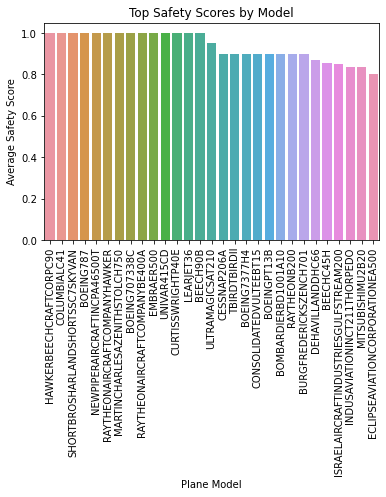

In [294]:
df['MakeModel'] = df['Make'] + df['Model']
#Added column to combine Make and Model into one name

df_makemodel = df.groupby(['MakeModel']).mean().sort_values(by = 'Safety Score', ascending = False).reset_index()
#Arranged a dataframe with MakeModel as the index and the mean values of each numerical column as the values.
#Then, reset the index so MakeModel becomes a column again, maintaining the sorting

df_makemodel_top29 = df_makemodel.iloc[:29]
#Selected only the top 29 rows

ax = sns.barplot(x=df_makemodel_top29['MakeModel'], y=df_makemodel_top29['Safety Score'], data=df_makemodel_top29);
#Created a barplot that showed the top 29 MakeModels and their average safety score

ax.set_title('Top Safety Scores by Model')
ax.set(xlabel = 'Plane Model', ylabel = 'Average Safety Score')
ax.tick_params(axis = 'x', rotation = 90)
#Rotated the x ticks to make them legible and titled graph

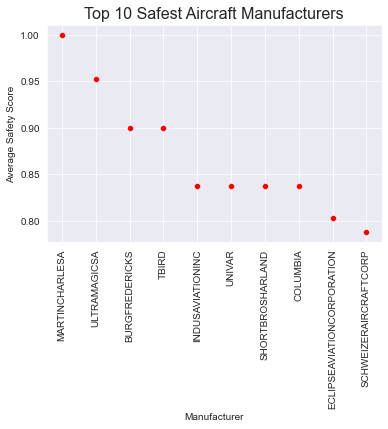

In [330]:
df_make = df.groupby(['Make']).mean().sort_values(by = 'Safety Score', ascending = False).reset_index()
#Arranged a dataframe with Make as the index and the mean values of each numerical column as the values.
#Then, reset the index so Make becomes a column again, maintaining the sorting

df_make_top10 = df_make.iloc[:10]
#Selected the top 10 makes with the highest average safety scores over all their models

sns.set_style('darkgrid')
ax1 = sns.scatterplot(x=df_make_top10['Make'], y=df_make_top10['Safety Score'], data = df_make_top10, color = 'red')
#Created a scatterplot with the top 10 Makes and their average safety scores across all of their models


ax1.set_title('Top 10 Safest Aircraft Manufacturers', fontsize = 16)
ax1.set(xlabel = 'Manufacturer', ylabel = 'Average Safety Score')
ax1.set_xticks(range(len(df_make_top10)))
ax1.set_xticklabels(list(df_make_top10['Make']))
ax1.tick_params(axis = 'x', rotation = 90)
#Set x ticks so that they are legible, there is 1 for each Make, and that each tick is labeled.  Gave titles to x-axis, y-axis, and overall graph

In [296]:
df_cost['Ten Year Cost (Millions)'] = df_cost['Price'] + (10 * df_cost['Annual Budget'])
df_cost['Twenty Five Year Cost (Millions)'] = df_cost['Price'] + (25 * df_cost['Annual Budget'])
df_cost[''] = df_cost['Make and Model']
#Create columns for 10-Year and 25-Year costs as a function of Price and Annual Budget

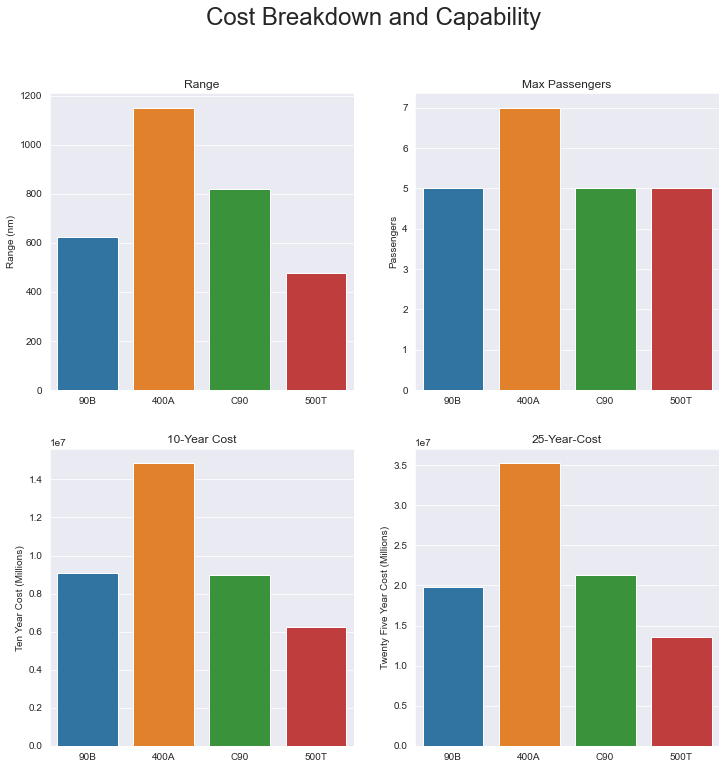

In [326]:
fig, axs = plt.subplots(ncols=2, nrows=2)
#Create a 2 x 2 grid of subplots

sns.set_style('whitegrid')
sns.barplot(x = df_cost[''], y = df_cost['Range (nm)'], data = df_cost, ax = axs[0, 0]).set_xticklabels(['90B', '400A', 'C90', '500T'])
sns.barplot(x = df_cost[''], y = df_cost['Passengers'], data = df_cost, ax = axs[0,1]).set_xticklabels(['90B', '400A', 'C90', '500T'])
sns.barplot(x = df_cost[''], y = df_cost['Ten Year Cost (Millions)'], data = df_cost, ax = axs[1,0]).set_xticklabels(['90B', '400A', 'C90', '500T'])
sns.barplot(x = df_cost[''], y = df_cost['Twenty Five Year Cost (Millions)'], data = df_cost, ax = axs[1,1]).set_xticklabels(['90B', '400A', 'C90', '500T'])
#Create graphs for Range, Passenger count, 10-Year Cost, and 25-Year Cost and shorten model names to be more legible

fig.suptitle('Cost Breakdown and Capability', fontsize = 24)
axs[0,0].set_title('Range')
axs[0,1].set_title('Max Passengers')
axs[1,0].set_title('10-Year Cost')
axs[1,1].set_title('25-Year-Cost')
fig.set_figheight(12)
fig.set_figwidth(12)
#Increase figure size so everything is legible

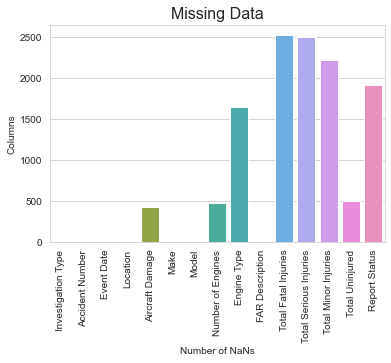

In [328]:
categories = ['Investigation Type', 'Accident Number', 'Event Date', 'Location', 'Aircraft Damage', 'Make', 'Model', 'Number of Engines', 'Engine Type', 'FAR Description', 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured', 'Report Status']
missingness = [0, 0, 0, 0, 431, 0, 0, 484, 1649, 2, 2524, 2501, 2220, 508, 1924]
#Since we eliminated this column earlier, this info had to be hard-coded in

ax2 = sns.barplot(x = categories, y = missingness)
ax2.set_title('Missing Data', fontsize = 16)
ax2.set(xlabel = 'Number of NaNs', ylabel = 'Columns')
ax2.tick_params(axis = 'x', rotation = 90)
#Created graph of missing data by column in the original dataset